**Lecturer**

Set up MATLAB

In [1]:
%cd matlab
pwd
clear all
format compact

/Users/eechris/dev/eglm03-textbook/content/04/2/matlab/matlab

ans =

    '/Users/eechris/dev/eglm03-textbook/content/04/2'



# Tuning a PID Compensator

This Section presents an example that illustrates the effects of tuning the PID parameters on the step and error response of a simple system. The system model used is that of Figure 3.8 in Franklin, Powell and Emami-Naeni's 
"Feedback Control of Dynamic Systems" (2nd Ed.).

## The PID Compensator

A PID compensator has the transfer function:

$$D(s)=\frac{U(s)}{E(s)}=K_\textrm{prop}+\frac{K_I}{s}+sK_D(s)$$

$$\begin{equation}D(s)=\frac{K_Ds^2 + K_\textrm{prop}s+K_I}{s}\end{equation}$$

This can be rearranged into a form that is often found in commercial implementations 
of the PID compensator:

$$\begin{eqnarray}D(s) &=& \frac{K_{\mathrm{prop}}\left( \left(K_D/K_{\mathrm{prop}}s^2\right)+s+\left(K_I/K_{\mathrm{prop}}\right)\right)}{s}\nonumber\\
&=&\frac{K_{\rm{prop}}\left( T_D s^2 + s + 1/T_I \right)}{s}\nonumber\\
D(s) &=& K_{\rm{prop}}\left(1 + T_Ds + 1/\left( T_I s\right)\right)\end{eqnarray}$$

where $K_\textrm{prop}$ is called the "proportional gain" (with units of 
percentage, i.e. 100% is equivalent to  $D(s)=1$), $T_D=K_D/K_\textrm{prop}$ 
is known as the "derivative time", $T_I=K_I/K_\textrm{prop}$ is the "integral 
or _reset time_" and $1/T_I$ is called the "reset rate". The tuning parameters 
provided with commercial PID compensators are often calibrated in these units. 

## Tuning the PID

In this example a simple type 0 control system with open loop transfer function:

$$G(s) = \frac{1}{(s+1)(5s+1)}$$

is to be compensated with a PID compensator and the step and error responses 
are considered as each parameter is adjusted.

We first define the plant:

In [2]:
s = tf('s');
G = 1/((s + 1)*(5*s + 1))


G =
 
         1
  ---------------
  5 s^2 + 6 s + 1
 
Continuous-time transfer function.



We then obtain the step response and error responses of the plant with 
unity gain feedback and no controller.

The closed loop transfer function of the system is 

$$G_c(s)=\frac{G(s)}{1+G(s)}$$

In [3]:
Gc=feedback(G,1)


Gc =
 
         1
  ---------------
  5 s^2 + 6 s + 2
 
Continuous-time transfer function.



The error transfer function is given by

$$G_e(s) = \frac{1}{1+G(s)}$$

In [4]:
Ge=1/(1+G)


Ge =
 
  5 s^2 + 6 s + 1
  ---------------
  5 s^2 + 6 s + 2
 
Continuous-time transfer function.



To simulate these responses:

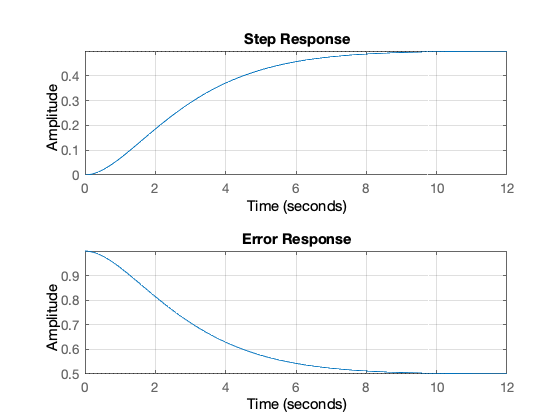

In [5]:
subplot(211),step(Gc),title('Step Response'),grid
subplot(212),step(Ge),title('Error Response'),grid

The incompensated system has a large steady-state step error of 0.5 (or 50%). It is also overdamped and therefore slow.

## First Tuning Stage: Add Proportional Gain

Let us add some proportional control to increase the rise time and to reduce the error to 5%. Increasing the proportional gain of the system can satisfy the error requirement 

In [6]:
Kprop = 19;  
D = Kprop;  
Go = D*G


Go =
 
        19
  ---------------
  5 s^2 + 6 s + 1
 
Continuous-time transfer function.



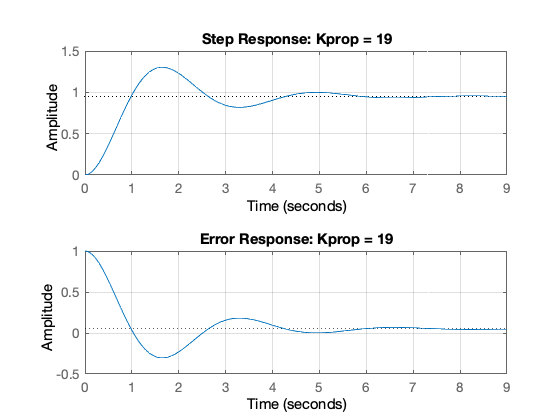

In [7]:
Gc = feedback(Go,1);
Ge = 1/(1 + Go);  
subplot(211),step(Gc),title('Step Response: Kprop = 19'),grid
subplot(212),step(Ge),title('Error Response: Kprop = 19'),grid

Note that the steady-state error is now 5% as required and that the proportional controller has speeded up the response time, but at the cost of reduced damping and excessive overshoot and settling time.

## Second Tuning Stage: Add Derivative Action

To reduce the overshoot and settling time we add some derivative action to 
dampen the response without affecting the steady state error.

In [8]:
Td = 4/19;  
Deriv = Td*s;
D = Kprop *(1 + Deriv);  
Go = D*G;

In [9]:
Gc = feedback(Go,1)  
Ge=1/(1 + Go)


Gc =
 
      4 s + 19
  -----------------
  5 s^2 + 10 s + 20
 
Continuous-time transfer function.


Ge =
 
   5 s^2 + 6 s + 1
  -----------------
  5 s^2 + 10 s + 20
 
Continuous-time transfer function.



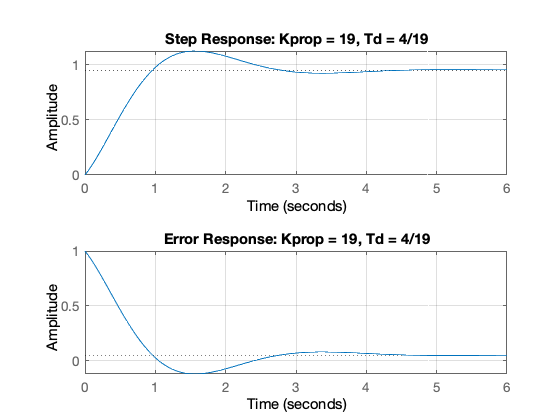

In [10]:
subplot(211),step(Gc),title('Step Response: Kprop = 19, Td = 4/19'),grid
subplot(212),step(Ge),title('Error Response: Kprop = 19, Td = 4/19'),grid

## Third Tuning Stage: Add Integral Action

Finally adding some integral action will eliminate the steady-state step error 
altogether.

In [11]:
Ti = 2;  
Integ = (1/Ti)/s;
D = Kprop*(1 + Deriv + Integ);  
Go = D*G


Go =
 
  4 s^2 + 19 s + 9.5
  ------------------
  5 s^3 + 6 s^2 + s
 
Continuous-time transfer function.



In [12]:
Gc=feedback(Go,1)
Ge=1/(1 + Go)


Gc =
 
      4 s^2 + 19 s + 9.5
  ---------------------------
  5 s^3 + 10 s^2 + 20 s + 9.5
 
Continuous-time transfer function.


Ge =
 
       5 s^3 + 6 s^2 + s
  ---------------------------
  5 s^3 + 10 s^2 + 20 s + 9.5
 
Continuous-time transfer function.



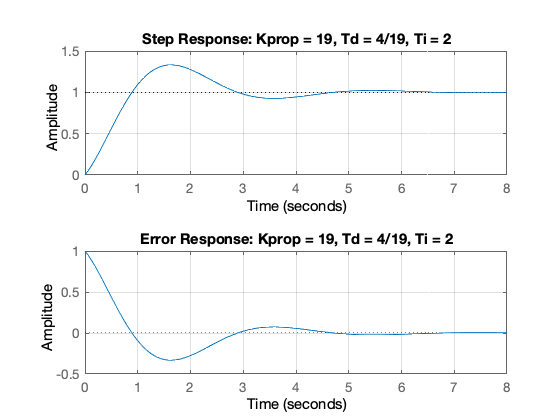

In [13]:
subplot(211),step(Gc),title('Step Response: Kprop = 19, Td = 4/19, Ti = 2'),grid 
subplot(212),step(Ge),title('Error Response: Kprop = 19, Td = 4/19, Ti = 2'),grid

## Comments
One would probably try further adjustments to reduce the overshoot that the 
addition of integral action produces

## Exercises

You might like to try further adjustments of the parameters $K_{\mathrm{prop}}$, $T_d$ and $T_I$.

See also the companion documents on the [Analytical design of a PID compensator]() 
and [Zeigler-Nichols tuning]() and [Autotuning a PID Compensator with MATLAB]().

## Resources

An executable version of this document is available to download as a MATLAB Live Script file [pid_tuning.mlx](matlab/pid_tuning.mlx). You can simulate this design using the file [pid_cl.slx](matlab/pid_cl.slx).